In [1]:

import numpy as np
import h5py
import re
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
# For Output
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

## Importing the Data SET

In [2]:
df_data =pd.read_csv('deb_data_raw.csv')

df_data

,comments,reaction_type
0,নবীজির কণ্ঠে কোরআন তিলাওয়াত এতোই সুন্দর ছিলো য...,positive
1,ভাই ছোটবেলার কথা মনে পরে গেলো অনেকবার দেখেছি ছ...,neutral
2,ওহ ভাই দারুন হয়েছে,positive
3,আমি ছোট বেলায় দেখেছি সিডি ডিক্স এখুব মজা পেয়েছ...,neutral
4,সবসময় আপনার ভিডিও অপেক্ষায় থাকিএই ছবিটা অনেক ব...,positive
...,...,...
18257,মানতে পারি নাই,neutral
18258,ভাই এটা কি দেখলাম,neutral
18259,একটা কমেন্ট রেখে গেলাম,positive
18260,এটা কী হয়,neutral


## Preprocessing

In [3]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct

def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [4]:
df_data['comments'] = df_data.comments.apply(lambda x: preprocessing(str(x)))

In [5]:
df_data

,comments,reaction_type
0,নবীজির কণ্ঠে কোরআন তিলাওয়াত এতোই সুন্দর ছিলো য...,positive
1,ভাই ছোটবেলার কথা মনে পরে গেলো অনেকবার দেখেছি ছ...,neutral
2,ওহ ভাই দারুন হয়েছে,positive
3,আমি ছোট বেলায় দেখেছি সিডি ডিক্স এখুব মজা পেয়েছ...,neutral
4,সবসময় আপনার ভিডিও অপেক্ষায় থাকিএই ছবিটা অনেক ব...,positive
...,...,...
18257,মানতে পারি নাই,neutral
18258,ভাই এটা কি দেখলাম,neutral
18259,একটা কমেন্ট রেখে গেলাম,positive
18260,এটা কী হয়,neutral


## Stopwords Removal

In [6]:
data1 =pd.read_excel('stopwords_bangla.xlsx')
display(data1)
stop = data1['words'].tolist()

,words
0,অই
1,অগত্যা
2,অত: পর
3,অতএব
4,অথচ
...,...
727,হয়েই
728,হয়েছিল
729,হয়েছে
730,হয়েছেন


In [7]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [8]:
# df_data['comments'] = df_data.comments.apply(lambda x: stopwordRemoval(str(x)))

## Stemming

In [9]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [10]:
# df_data['comments']=df_data['comments'].apply(stem_text)

## Checking the Data

In [11]:
df_data

,comments,reaction_type
0,নবীজির কণ্ঠে কোরআন তিলাওয়াত এতোই সুন্দর ছিলো য...,positive
1,ভাই ছোটবেলার কথা মনে পরে গেলো অনেকবার দেখেছি ছ...,neutral
2,ওহ ভাই দারুন হয়েছে,positive
3,আমি ছোট বেলায় দেখেছি সিডি ডিক্স এখুব মজা পেয়েছ...,neutral
4,সবসময় আপনার ভিডিও অপেক্ষায় থাকিএই ছবিটা অনেক ব...,positive
...,...,...
18257,মানতে পারি নাই,neutral
18258,ভাই এটা কি দেখলাম,neutral
18259,একটা কমেন্ট রেখে গেলাম,positive
18260,এটা কী হয়,neutral


## Removing Null values

In [12]:
#display non-null values
df_data = df_data.dropna()

## Removing Small Texts

In [13]:
#counting text length
# df_data['count'] = df_train['comments'].str.split().str.len()
# Remove the text with words less than 5
# df_data= df_data.loc[df_data['count']>5]

## Checking the Data

In [14]:
df_data

,comments,reaction_type
0,নবীজির কণ্ঠে কোরআন তিলাওয়াত এতোই সুন্দর ছিলো য...,positive
1,ভাই ছোটবেলার কথা মনে পরে গেলো অনেকবার দেখেছি ছ...,neutral
2,ওহ ভাই দারুন হয়েছে,positive
3,আমি ছোট বেলায় দেখেছি সিডি ডিক্স এখুব মজা পেয়েছ...,neutral
4,সবসময় আপনার ভিডিও অপেক্ষায় থাকিএই ছবিটা অনেক ব...,positive
...,...,...
18257,মানতে পারি নাই,neutral
18258,ভাই এটা কি দেখলাম,neutral
18259,একটা কমেন্ট রেখে গেলাম,positive
18260,এটা কী হয়,neutral


## Changing Labels to Numbers


In [15]:
df_data["reaction_type"].replace({"negative": "0", "positive": "1","neutral": "2" }, inplace=True)

/tmp/ipykernel_19081/1620500157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data["reaction_type"].replace({"negative": "0", "positive": "1","neutral": "2" }, inplace=True)


In [16]:
df_data

,comments,reaction_type
0,নবীজির কণ্ঠে কোরআন তিলাওয়াত এতোই সুন্দর ছিলো য...,1
1,ভাই ছোটবেলার কথা মনে পরে গেলো অনেকবার দেখেছি ছ...,2
2,ওহ ভাই দারুন হয়েছে,1
3,আমি ছোট বেলায় দেখেছি সিডি ডিক্স এখুব মজা পেয়েছ...,2
4,সবসময় আপনার ভিডিও অপেক্ষায় থাকিএই ছবিটা অনেক ব...,1
...,...,...
18257,মানতে পারি নাই,2
18258,ভাই এটা কি দেখলাম,2
18259,একটা কমেন্ট রেখে গেলাম,1
18260,এটা কী হয়,2


## Splitin Data into 80% Train and 20% Test

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_data['comments'], df_data['reaction_type'], test_size=0.2, random_state=42)

## Feature Extraction with TFIDF

In [18]:

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# ID3-like Model

## Train the ID3-like Model and Calculate the Accuracy

In [19]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Train Decision Tree with 'entropy' criterion (ID3-like model)
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = id3.predict(X_test_tfidf)
y_prob = id3.predict_proba(X_test_tfidf)

# Calculate metrics
accuracy = id3.score(X_test_tfidf, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fscore = f1_score(y_test, y_pred, average='weighted')

print(f"Testing Accuracy: {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1 Score : {fscore:.4f}")


Testing Accuracy: 0.5371
Precision : 0.5339
Recall : 0.5371
F1 Score : 0.5354


## Generate and Plot the Confusion Matrix

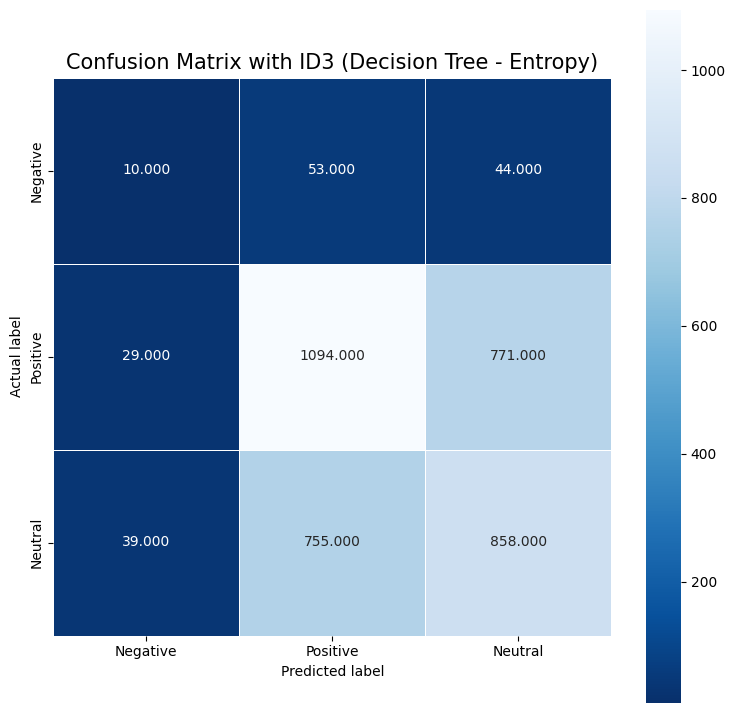

In [20]:
# Generate confusion matrix
labels = ['0', '1', '2']
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive', 'Neutral'], columns=['Negative', 'Positive', 'Neutral'])

# Plot confusion matrix
plt.figure(figsize=(9, 9))
sns.heatmap(cm_df, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with ID3 (Decision Tree - Entropy)', size=15)
plt.show()


## Generate and Display the Classification Report

In [21]:
# Generate classification report
report = pd.DataFrame(classification_report(y_test, y_pred, labels=labels, output_dict=True)).transpose()
report = report.rename(index={'0': 'Negative', '1': 'Positive', '2': 'Neutral'})
report[['precision', 'recall', 'f1-score']] = report[['precision', 'recall', 'f1-score']].apply(lambda x: round(x * 100, 2))

# Display classification report
print("Classification Report:")
print(report)

Classification Report:
              precision  recall  f1-score      support
Negative          12.82    9.35     10.81   107.000000
Positive          57.52   57.76     57.64  1894.000000
Neutral           51.29   51.94     51.61  1652.000000
accuracy          53.71   53.71     53.71     0.537093
macro avg         40.54   39.68     40.02  3653.000000
weighted avg      53.39   53.71     53.54  3653.000000


## Plot ROC Curves and Class Distribution Bar Plot

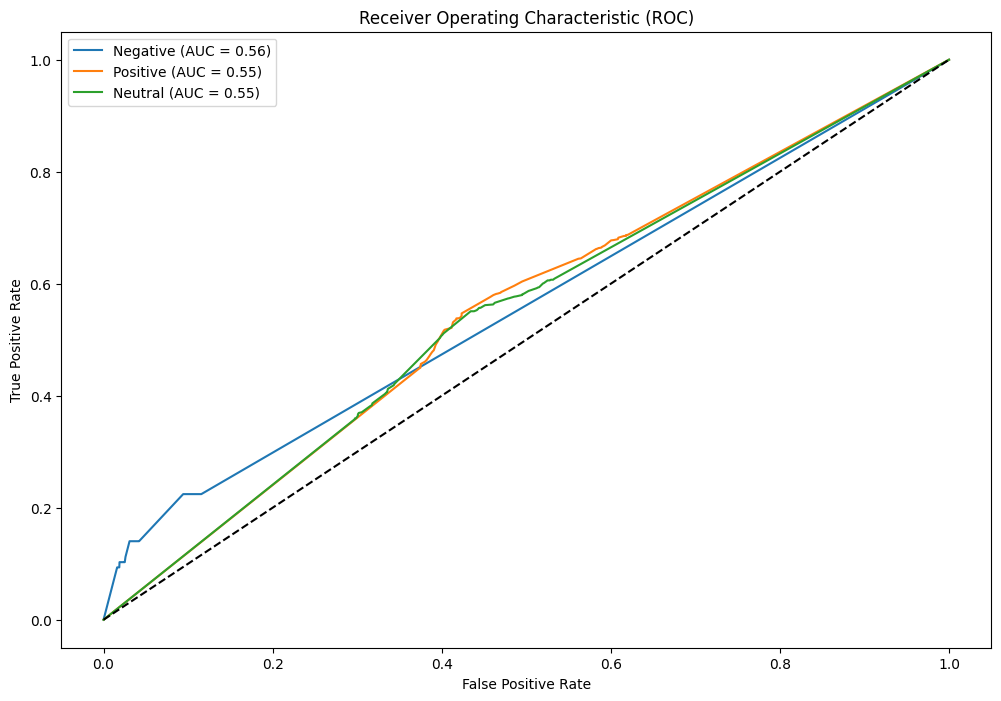

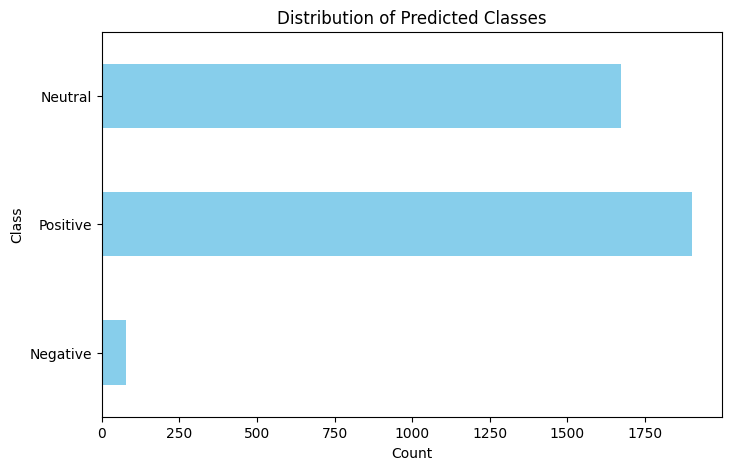

In [22]:
# ROC Curve
y_test_bin = label_binarize(y_test, classes=labels)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{["Negative", "Positive", "Neutral"][i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.show()

# Horizontal bar plot of predicted class distributions
class_counts = pd.Series(y_pred).value_counts().sort_index()
class_counts.index = ['Negative', 'Positive', 'Neutral']

plt.figure(figsize=(8, 5))
class_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Distribution of Predicted Classes')
plt.show()
